<a href="https://colab.research.google.com/github/dabin3178/Korean-Newords-NLP/blob/main/%EB%B3%80%EC%88%98_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Project/labeling_oversampling.csv')
#df1 = pd.read_csv('/content/drive/MyDrive/Project/labeling.csv')
df1

,freq,freq_ratio,length,cohesion_forward,left_branching_entropy,right_branching_entropy,left_accessor_variety,starts_ratio,label
0,64,0.000134,3,0.383131,2.252728,2.242973,11,100,0
1,72,0.000151,3,0.435494,2.145842,2.813355,9,61,0
2,124,0.000260,3,0.081250,2.677950,2.930741,16,80,0
3,120,0.000251,3,0.172516,2.996636,1.328738,22,100,0
4,252,0.000528,4,0.133749,3.286232,3.575031,30,66,0
...,...,...,...,...,...,...,...,...,...
29863,112,0.000234,4,0.213300,2.862045,2.752784,19,100,1
29864,124,0.000260,3,0.090609,1.006280,2.667524,6,58,1
29865,4183,0.008757,2,0.089104,4.069535,4.828223,180,97,1
29866,300,0.000628,3,0.120524,3.553385,3.605470,45,100,1


In [ ]:
df = df1.drop(['freq_ratio'], axis = 1)
df

,freq,length,cohesion_forward,left_branching_entropy,right_branching_entropy,left_accessor_variety,starts_ratio,label
0,64,3,0.383131,2.252728,2.242973,11,100,0
1,72,3,0.435494,2.145842,2.813355,9,61,0
2,124,3,0.081250,2.677950,2.930741,16,80,0
3,120,3,0.172516,2.996636,1.328738,22,100,0
4,252,4,0.133749,3.286232,3.575031,30,66,0
...,...,...,...,...,...,...,...,...
29863,112,4,0.213300,2.862045,2.752784,19,100,1
29864,124,3,0.090609,1.006280,2.667524,6,58,1
29865,4183,2,0.089104,4.069535,4.828223,180,97,1
29866,300,3,0.120524,3.553385,3.605470,45,100,1


In [ ]:
label = df[df.columns[0:8]]
label

,freq,length,cohesion_forward,left_branching_entropy,right_branching_entropy,left_accessor_variety,starts_ratio,label
0,64,3,0.383131,2.252728,2.242973,11,100,0
1,72,3,0.435494,2.145842,2.813355,9,61,0
2,124,3,0.081250,2.677950,2.930741,16,80,0
3,120,3,0.172516,2.996636,1.328738,22,100,0
4,252,4,0.133749,3.286232,3.575031,30,66,0
...,...,...,...,...,...,...,...,...
29863,112,4,0.213300,2.862045,2.752784,19,100,1
29864,124,3,0.090609,1.006280,2.667524,6,58,1
29865,4183,2,0.089104,4.069535,4.828223,180,97,1
29866,300,3,0.120524,3.553385,3.605470,45,100,1


In [ ]:
#각 변수 간의 상관계수
corr_df = label.corr()
corr_df = corr_df.apply(lambda x : round(x,2))
corr_df

,freq,length,cohesion_forward,left_branching_entropy,right_branching_entropy,left_accessor_variety,starts_ratio,label
freq,1.00,-0.17,0.21,0.30,0.20,0.70,-0.06,0.03
length,-0.17,1.00,0.11,-0.37,-0.06,-0.29,0.05,-0.18
cohesion_forward,0.21,0.11,1.00,0.09,0.11,0.26,0.09,0.16
left_branching_entropy,0.30,-0.37,0.09,1.00,0.34,0.70,0.19,0.16
right_branching_entropy,0.20,-0.06,0.11,0.34,1.00,0.37,-0.25,0.25
left_accessor_variety,0.70,-0.29,0.26,0.70,0.37,1.00,0.06,0.14
starts_ratio,-0.06,0.05,0.09,0.19,-0.25,0.06,1.00,0.19
label,0.03,-0.18,0.16,0.16,0.25,0.14,0.19,1.00


In [ ]:
#위에서 표로 촤악 나타낸 걸 직관적으로 이해하기 쉽게 보자!
l = corr_df.unstack()
l

freq   freq                       1.00
       length                    -0.17
       cohesion_forward           0.21
       left_branching_entropy     0.30
       right_branching_entropy    0.20
                                  ... 
label  left_branching_entropy     0.16
       right_branching_entropy    0.25
       left_accessor_variety      0.14
       starts_ratio               0.19
       label                      1.00
Length: 64, dtype: float64

In [ ]:
#상관계수 높은 것부터 보기 편하게 예쁘게 나타내기(1은 자신과의 관계니까 제외함)
df = pd.DataFrame(l[l < 1].sort_values(ascending=False), columns=['corr'])
df.style.background_gradient(cmap='viridis')

Heatmap 데이터 시각화

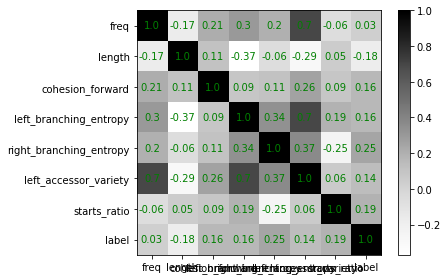

In [ ]:
#Matplotlib 사용
#이거 말고 다음 코드가 더 간편함
#즉, 이 코드 안 돌려도 된다는 얘기
fig, ax = plt.subplots()
im = ax.imshow(corr_df, cmap='Greys')

cbar = ax.figure.colorbar(im, ax=ax)

ax.set_xticks(np.arange(len(corr_df.columns)))
ax.set_yticks(np.arange(len(corr_df.index)))

ax.set_xticklabels(corr_df.columns)
ax.set_yticklabels(corr_df.columns)

for x in range(len(corr_df.columns)):
  for y in range(len(corr_df.index)):
    ax.text(y, x, corr_df.iloc[y,x], ha='center', va='center', color='g')

fig.tight_layout()
plt.show()

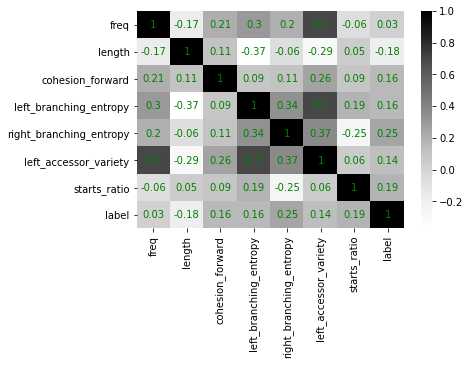

In [ ]:
#seaborn 사용하여 간편하게 Heatmap 그리기
fig, ax = plt.subplots()
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

In [ ]:
#nlargest, nsmallest 를 사용하여 지정한 컬럼 기준 상위, 하위 데이터를 추출할 수 있음
#이를 사용하여 상관관계지수가 높거나 낮은 데이터를 추출함
#sort_values와 head를 조합한 방법보다 더 나은 성능 제공
#근데 여기는 굳이 돌리지 않아도 될 듯

corr5 = corr_df.nlargest(5, 'freq') #freq를 기준으로 상관관계 높은 거 5개 뽑아보겠음 
corr5 = corr5[list(corr5.index)]
corr5

,freq,left_accessor_variety,left_branching_entropy,cohesion_forward,right_branching_entropy
freq,1.00,0.70,0.30,0.21,0.20
left_accessor_variety,0.70,1.00,0.70,0.26,0.37
left_branching_entropy,0.30,0.70,1.00,0.09,0.34
cohesion_forward,0.21,0.26,0.09,1.00,0.11
right_branching_entropy,0.20,0.37,0.34,0.11,1.00


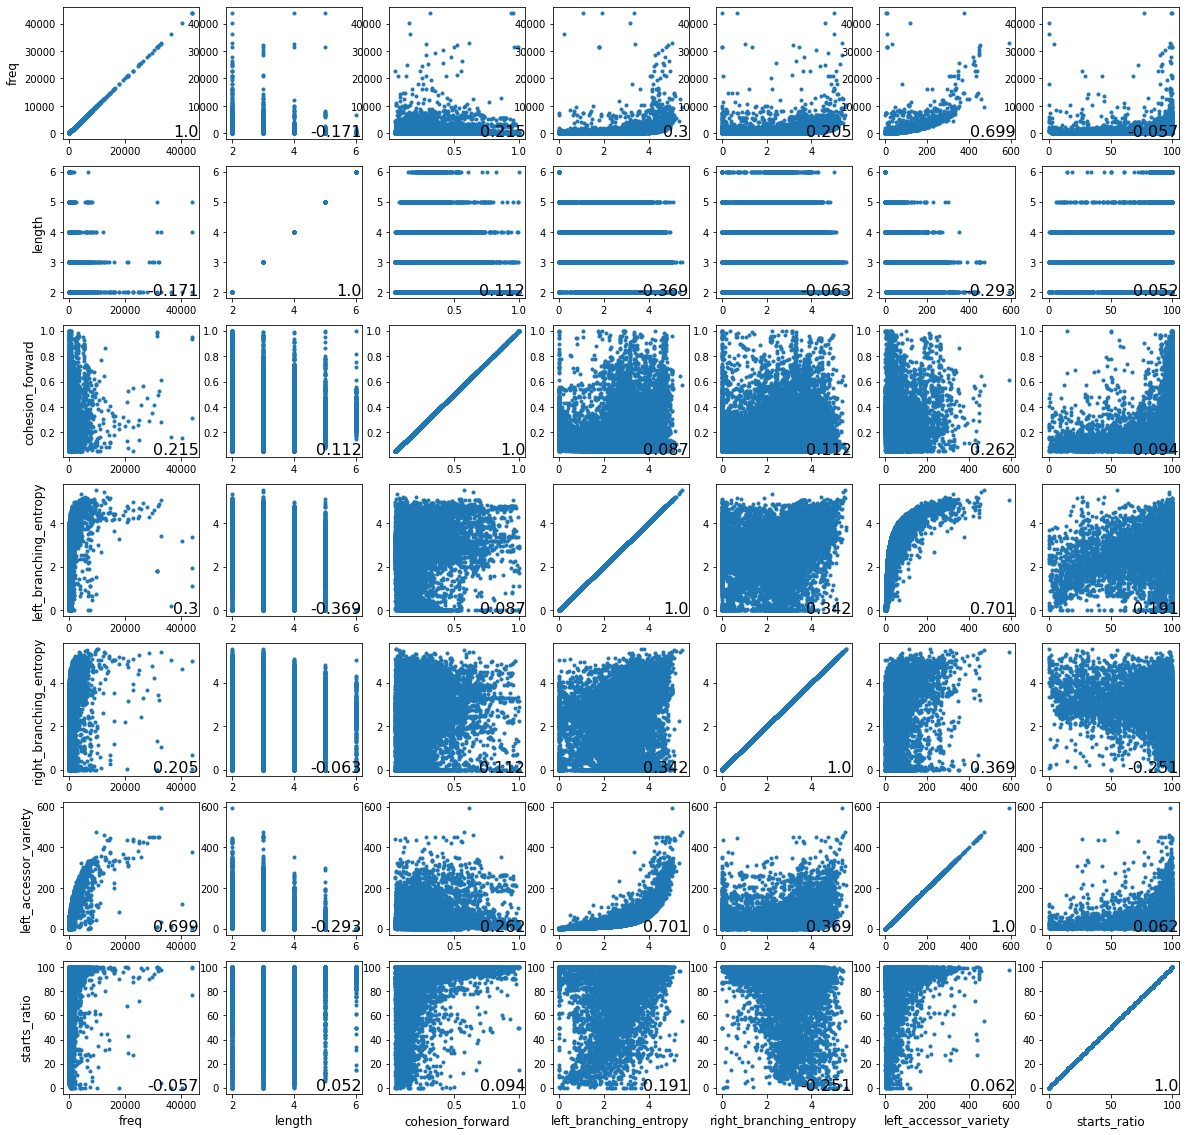

In [ ]:
#변수 간 상관관계를 산점도로 나타내보자
feature = ['freq',	'length',	'cohesion_forward',	'left_branching_entropy',	'right_branching_entropy', 'left_accessor_variety',	'starts_ratio']
n_feature = len(feature)
corr_feature = label[feature].corr()
fig = plt.figure(figsize=(20,20))

for i in range(n_feature):
  for j in range(n_feature):
    ax = fig.add_subplot(n_feature, n_feature, i*n_feature + j + 1)
    plt.scatter(feature[j], feature[i], data=label, s=9)

    if i == n_feature-1:
      plt.xlabel(feature[j], fontsize=12)
    if j == 0:
      plt.ylabel(feature[i], fontsize=12)
    ax.annotate(np.round(corr_feature.loc[feature[i], feature[j]], 3), xy=(1,0),xycoords='axes fraction', fontsize=16,horizontalalignment='right', verticalalignment='bottom')

plt.show()